In [12]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.optimize as opt
from matplotlib import rc
import matplotlib.pyplot as plt
plt.style.use('default')
# rc('font', **{'family': 'serif', 'serif': ['Times'], 'size': 16})
# rc('text', usetex=True)
# Figure dpi
dpi = 72

In [13]:
#1.1 One-D Maps
r = 2
f = lambda x : np.cos(x)#r*x*(1-x)

def g(x):
    funct = f(x)
    for i in range(20):
        funct = f(funct)
    return np.format_float_positional(funct, precision=8)

for i in range(0,11):
    print(g(0.1*i))

print()
h = lambda x: f(x)-x
np.format_float_positional(opt.brentq(h, 0.1, 1), precision=8) #solve for fixed points

0.7391844
0.73918256
0.73917701
0.73916771
0.73915465
0.73913791
0.73911776
0.73909474
0.73906969
0.73904376
0.73901826



'0.73908513'

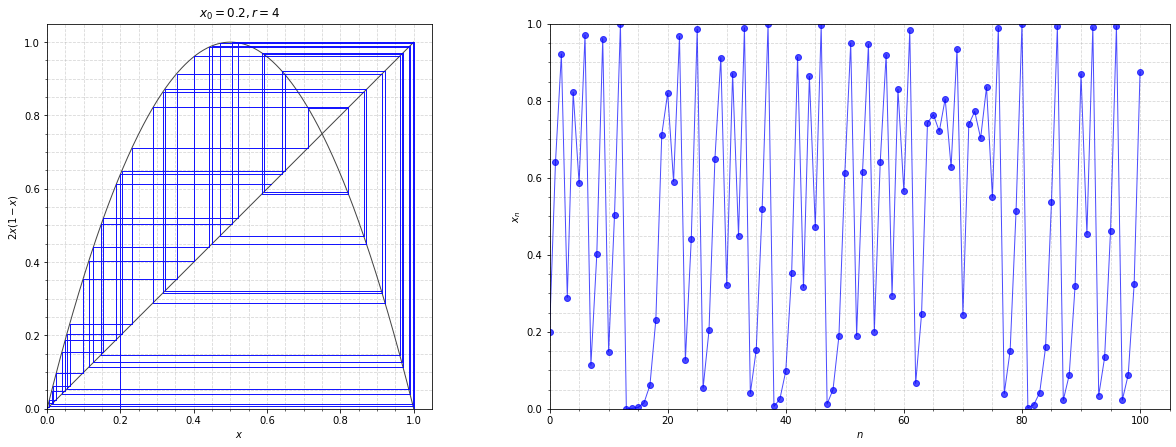

In [29]:
#1.2 Cobweb Plot: Graphical Representation of an Orbit
f = lambda x,r : r*x*(1-x)

def plot_cobweb(r0,x0):
    x = np.linspace(0,1,500)
    fig = plt.figure(figsize=(1600/dpi,500/dpi),dpi=dpi)
    ax = fig.add_subplot(121)

    # Plot y = f(x) and y = x
    ax.plot(x,f(x,r0),c='#444444',lw=1)
    ax.plot(x, x, c='#444444', lw=1)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1],r0)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7, lw=1)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5, ls='--')
    ax.grid(which='major', alpha=0.5, ls='--')
    ax.set_aspect('equal')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$2x(1-x)$')
    ax.set_title(r'$x_0 = {one}, r = {two}$'.format(one = x0, two = r0))#ax.set_title(r'$x_0 = {:.1}$'.format(x0))
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)


    n = range(0,nmax+1)
    xn = []
    for i in n:
        xn.append(x0)
        x0 = f(x0,r0)
    ax = fig.add_subplot(122)
    ax.plot(n, xn, c='b', alpha=0.7, lw=1, ls='-', marker='o')
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5, ls='--')
    ax.grid(which='major', alpha=0.5, ls='--')
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$x_n$')
    ax.set_ylim(bottom=0, top=1)
    ax.set_xlim(left=0)

    plt.subplots_adjust(wspace=0)
    plt.show()

nmax=100
r0 = 4
x0 = 0.2
plot_cobweb(r0,x0)

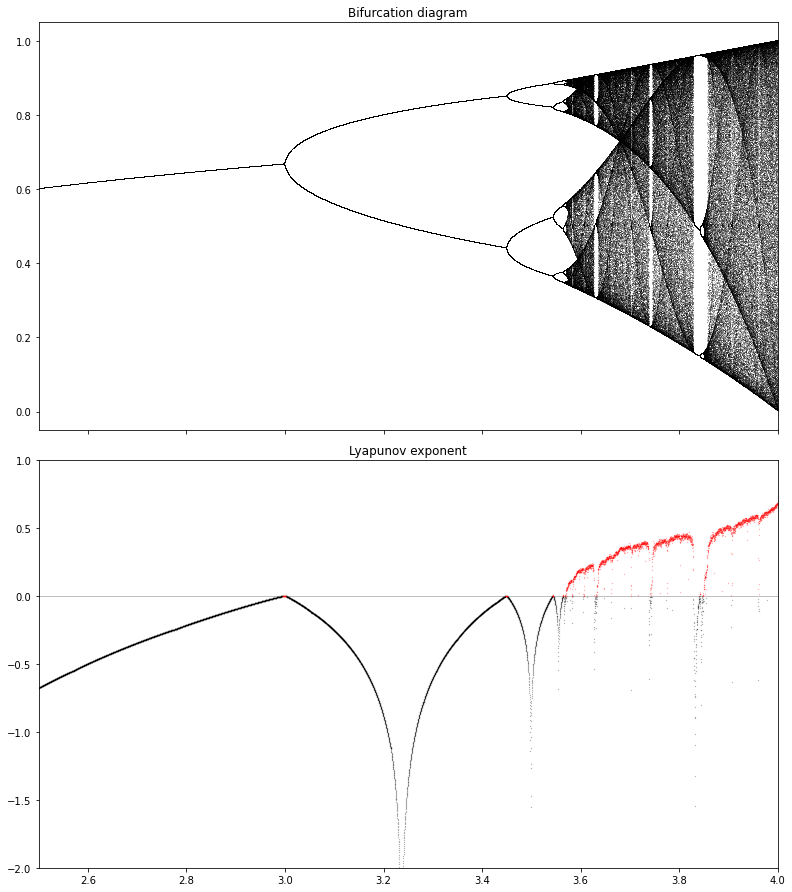

In [12]:
def f(r, x):
    return r*x*(1-x)

n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(800/dpi,900/dpi),sharex=True, dpi=dpi)
for i in range(iterations):
    x = f(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25, lw=1)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5, lw=1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

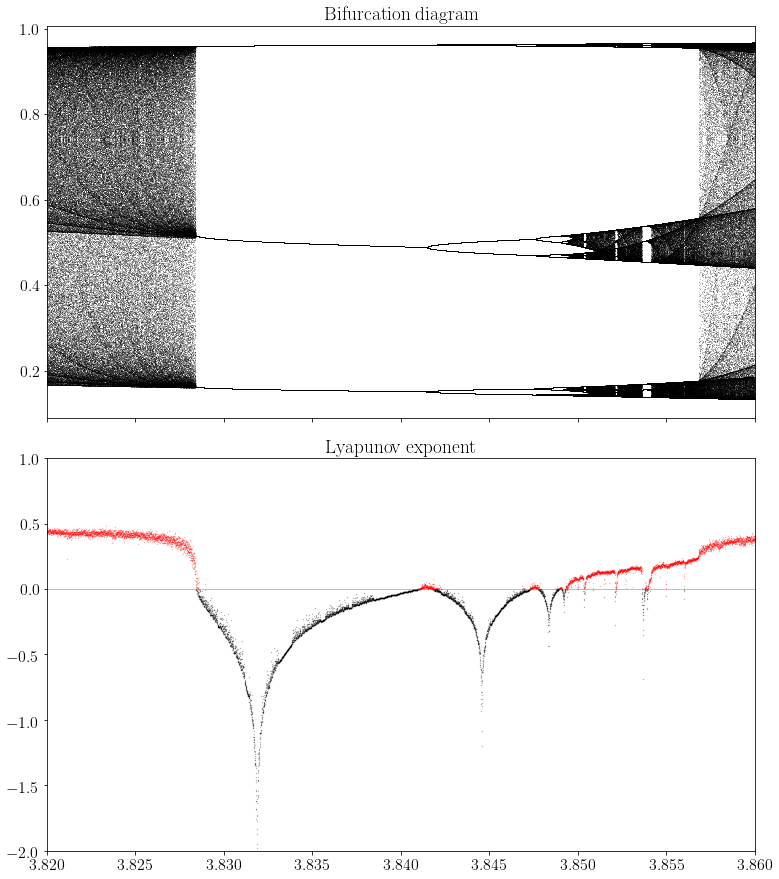

In [63]:
n = 10000
r = np.linspace(3.82,3.86, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(800/dpi,900/dpi),sharex=True, dpi=dpi)
for i in range(iterations):
    x = f(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25, lw=1)
ax1.set_xlim(3.82,3.86)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5, lw=1)
ax2.set_xlim(3.82,3.86)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

In [ ]:
# Websites to consider
# ====================

# Serpinski Gasket: https://larryriddle.agnesscott.org/ifs/siertri/siertri.htm

(0,0,0)
(8.485811687752681, 8.485811687752681, 27)
(-8.485811687752681, -8.485811687752681, 27)


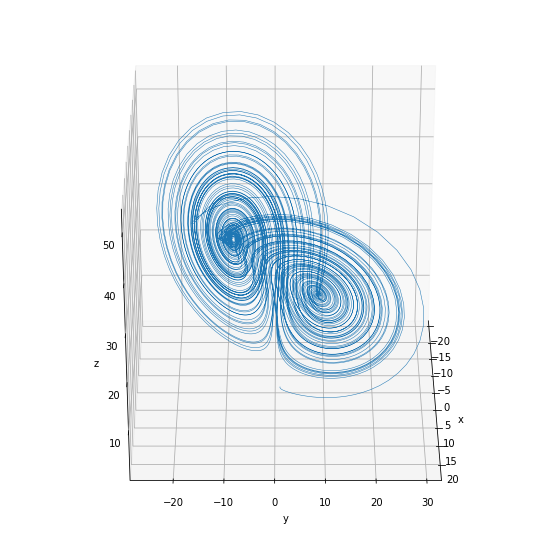

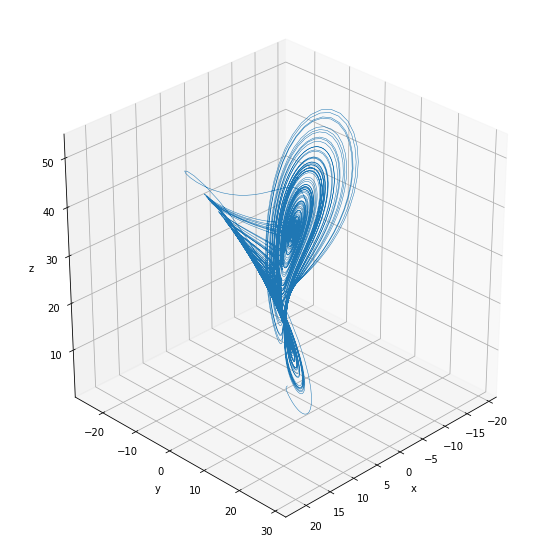

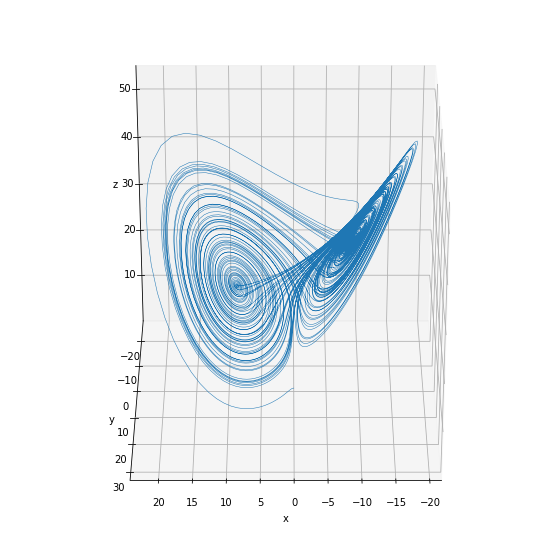

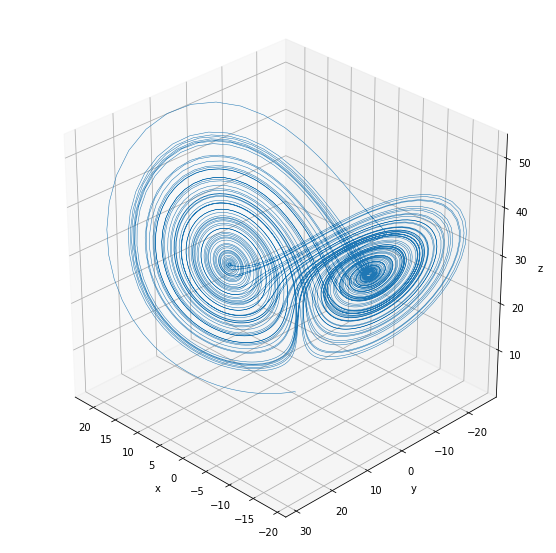

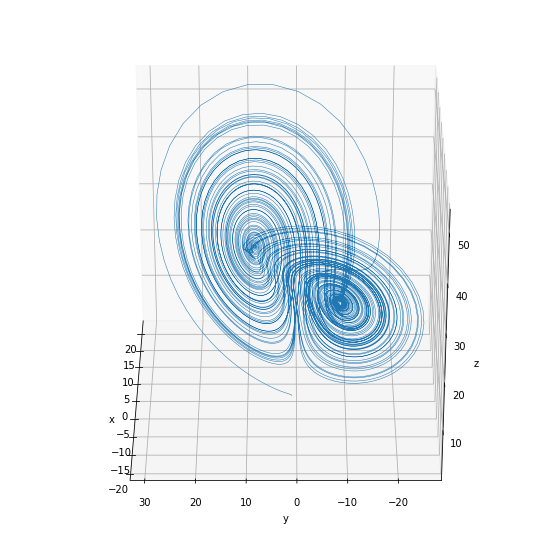

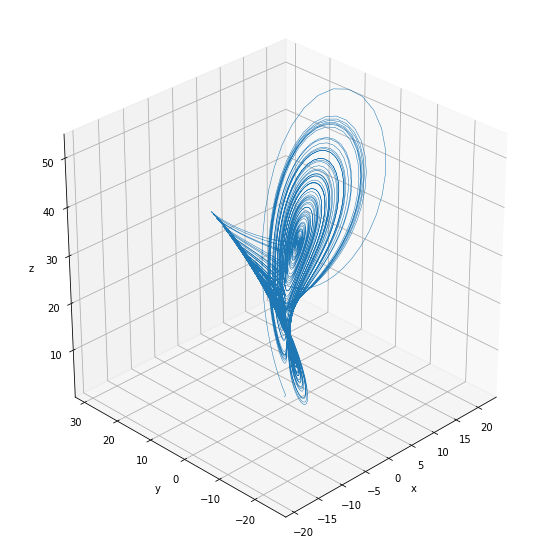

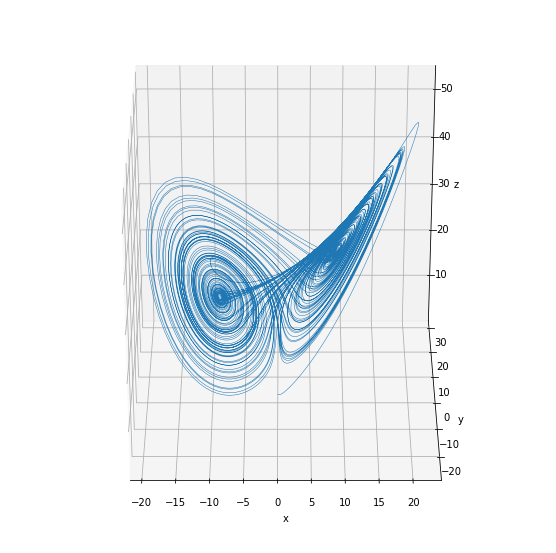

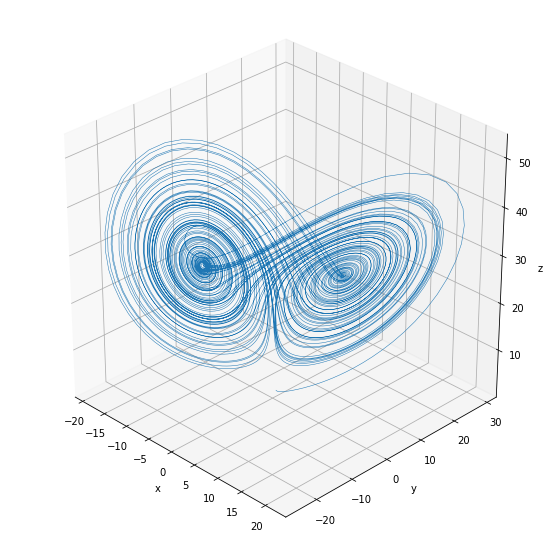

In [31]:
'''
[-\infty,1.00] -> (0,0,0) is an attracting equilibrium
[1.00,13.93] -> C_plus and C_minus are attracting equilibria; the origin is unstable
[13.93,24.06] -> Transient chaos: there are chaotic orbits but no chaotic attractors
[24.06,24.74] -> A chaotic attractor coexists with attracting equilibria C_plus and C_minus
[24.74,?] -> chaos: Chaotic attractor exists but C_plus and C_minus are no longer attracting
'''


def lorenz(x, y, z, s=10, r=28, b=2.667): 
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = -s*x + s*y
    y_dot = -x*z + r*x - y
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def plot_lorenz(angle):
    dt = 0.01
    num_steps = 10000
    # Need one more for the initial values
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # Set initial values
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt) # = xs[i] + dx
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    # Plot
    fig = plt.figure(figsize=(700/dpi,700/dpi),dpi=dpi)
    ax = fig.gca(projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.view_init(30,angle)
    plt.show()

b=2.667
r=28
print('(0,0,0)') #eq point for all r and for r < 1 it is a stable attractor, r >= 1 it is unstable
C_plus = (np.sqrt(b*(r-1)),np.sqrt(b*(r-1)),r-1) #for r >= 1
C_minus = (-np.sqrt(b*(r-1)),-np.sqrt(b*(r-1)),r-1)
print(C_plus)
print(C_minus)
for angle in range(0,360,45):
    plot_lorenz(angle)
    